### **Import Library**

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### **Muat data kanji dari file JSON**

In [2]:
with open('kanji.json', 'r', encoding='utf-8') as file:
    kanji_data = json.load(file)

### **Ubah data menjadi dataframe pandas**

In [39]:
df = pd.DataFrame.from_dict(kanji_data, orient='index')

### **Hapus baris dengan nilai NaN**

In [40]:
df.dropna(inplace=True)

### **Normalisasi jumlah pembacaan on dan kun**

In [41]:
df['readings_on_count'] = df['readings_on'].apply(len)
df['readings_kun_count'] = df['readings_kun'].apply(len)

### **Analisis Regresi**

In [42]:
X = df[['grade', 'strokes', 'readings_on_count', 'readings_kun_count']]
y = df['freq']

### **Bagi data menjadi data latih dan data uji**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Buat model regresi linear**

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### **Prediksi pada data uji**

In [45]:
y_pred = model.predict(X_test)

### **Evaluasi Model**

In [66]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 195899.03554736148
R-squared (R2): 0.48021242291356914


### **Visualisasi hasil regresi**

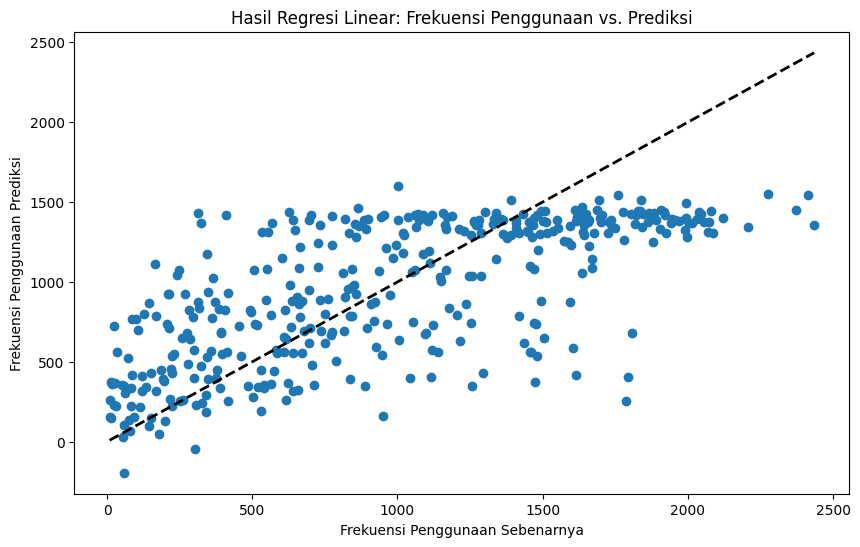

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Frekuensi Penggunaan Sebenarnya')
plt.ylabel('Frekuensi Penggunaan Prediksi')
plt.title('Hasil Regresi Linear: Frekuensi Penggunaan vs. Prediksi')
plt.show()

### **Visualisasi 3D**

In [65]:
df['color'] = pd.cut(df['freq'], bins=[0, 500, 1000, 2000, float('inf')],
                    labels=['biru frekuensi 0 - 500', 'hijau frekuensi 500 - 1000', 'oranye frekuensi 1000 - 2000', 'ungu frekuensi 2000 - 2500'])

hover_text = []
for index, row in df.iterrows():
    hover_text.append(f"Kanji: {index}<br>Frekuensi: {row['freq']}<br>Grade: {row['grade']}<br>Strokes: {row['strokes']}")

fig = px.scatter_3d(df, x='grade', y='strokes', z='freq',
                    color='color',
                    hover_data={'customdata': hover_text},
                    height=800, width=800,
                    title='Frekuensi Penggunaan vs. Tingkat Kesulitan dan Jumlah Goresan',
                    labels={'grade': 'Tingkat Kesulitan (Grade)', 'strokes': 'Jumlah Goresan', 'freq': 'Frekuensi Penggunaan'})
fig.update_traces(text=None, hovertemplate='%{customdata}')

fig.update_layout(scene=dict(
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
    zaxis=dict(title_font=dict(size=16))
))

fig.show()

### **Visualisasi scatter plot**

In [12]:
fig1 = px.scatter(df[df['jlpt_new']==1], x='grade', y='freq', hover_name=df[df['jlpt_new']==1].index,
                 title='Frekuensi Penggunaan vs. Tingkatan (JLPT N1)',
                 labels={'grade': 'Tingkat Kesulitan (Grade)', 'freq': 'Frekuensi Penggunaan'})
fig1.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig1.show()

fig2 = px.scatter(df[df['jlpt_new']==2], x='grade', y='freq', hover_name=df[df['jlpt_new']==2].index,
                 title='Frekuensi Penggunaan vs. Tingkatan (JLPT N2)',
                 labels={'grade': 'Tingkat Kesulitan (Grade)', 'freq': 'Frekuensi Penggunaan'})
fig2.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig2.show()

fig3 = px.scatter(df[df['jlpt_new']==3], x='grade', y='freq', hover_name=df[df['jlpt_new']==3].index,
                 title='Frekuensi Penggunaan vs. Tingkatan (JLPT N3)',
                 labels={'grade': 'Tingkat Kesulitan (Grade)', 'freq': 'Frekuensi Penggunaan'})
fig3.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig3.show()

fig4 = px.scatter(df[df['jlpt_new']==4], x='grade', y='freq', hover_name=df[df['jlpt_new']==4].index,
                 title='Frekuensi Penggunaan vs. Tingkatan (JLPT N4)',
                 labels={'grade': 'Tingkat Kesulitan (Grade)', 'freq': 'Frekuensi Penggunaan'})
fig4.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig4.show()

fig5 = px.scatter(df[df['jlpt_new']==5], x='grade', y='freq', hover_name=df[df['jlpt_new']==5].index,
                 title='Frekuensi Penggunaan vs. Tingkatan (JLPT N5)',
                 labels={'grade': 'Tingkat Kesulitan (Grade)', 'freq': 'Frekuensi Penggunaan'})
fig5.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig5.show()

### **Visualisasi Seaborn Histogram with KDE**

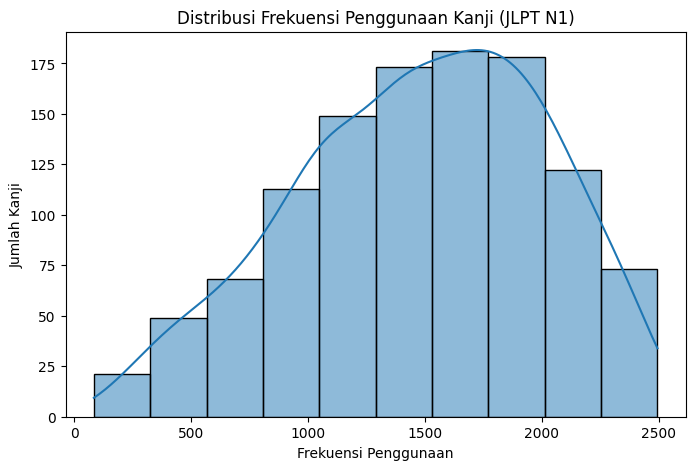

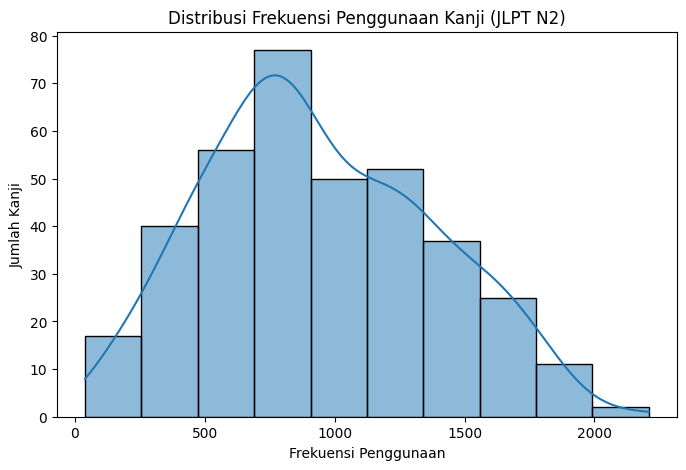

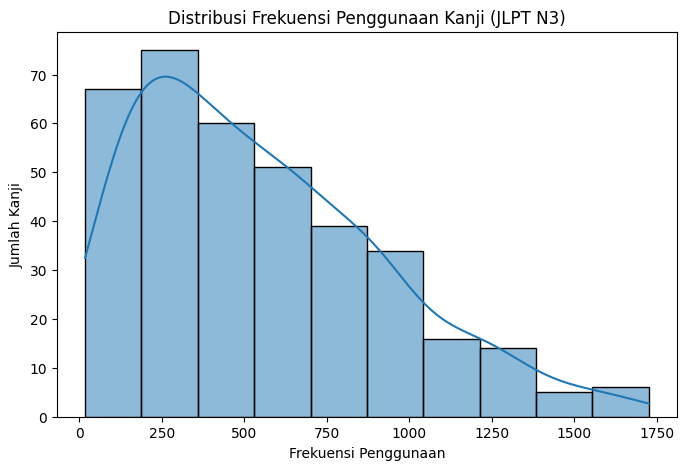

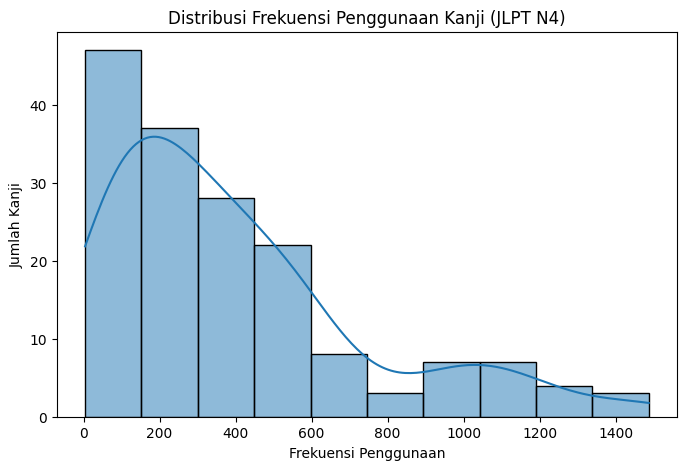

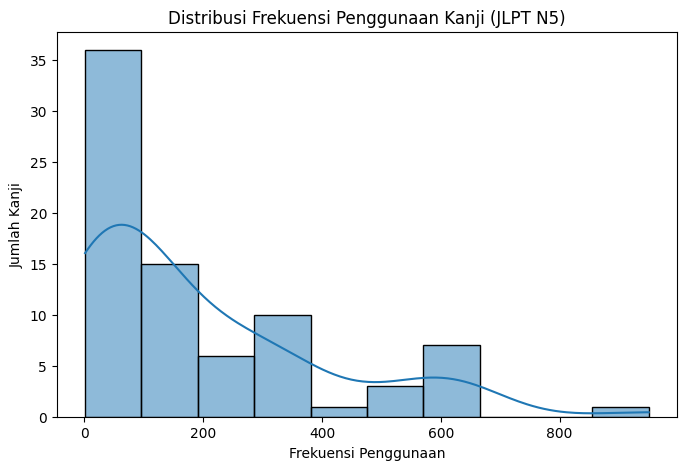

In [14]:
for level in range(1, 6):
    filtered_df = df[df['jlpt_new'] == level]

    plt.figure(figsize=(8, 5))  # Atur ukuran plot
    sns.histplot(filtered_df['freq'], bins=10, kde=True)
    plt.title(f'Distribusi Frekuensi Penggunaan Kanji (JLPT N{level})')
    plt.xlabel('Frekuensi Penggunaan')
    plt.ylabel('Jumlah Kanji')
    plt.show()

### **Visualisasi heatmap**

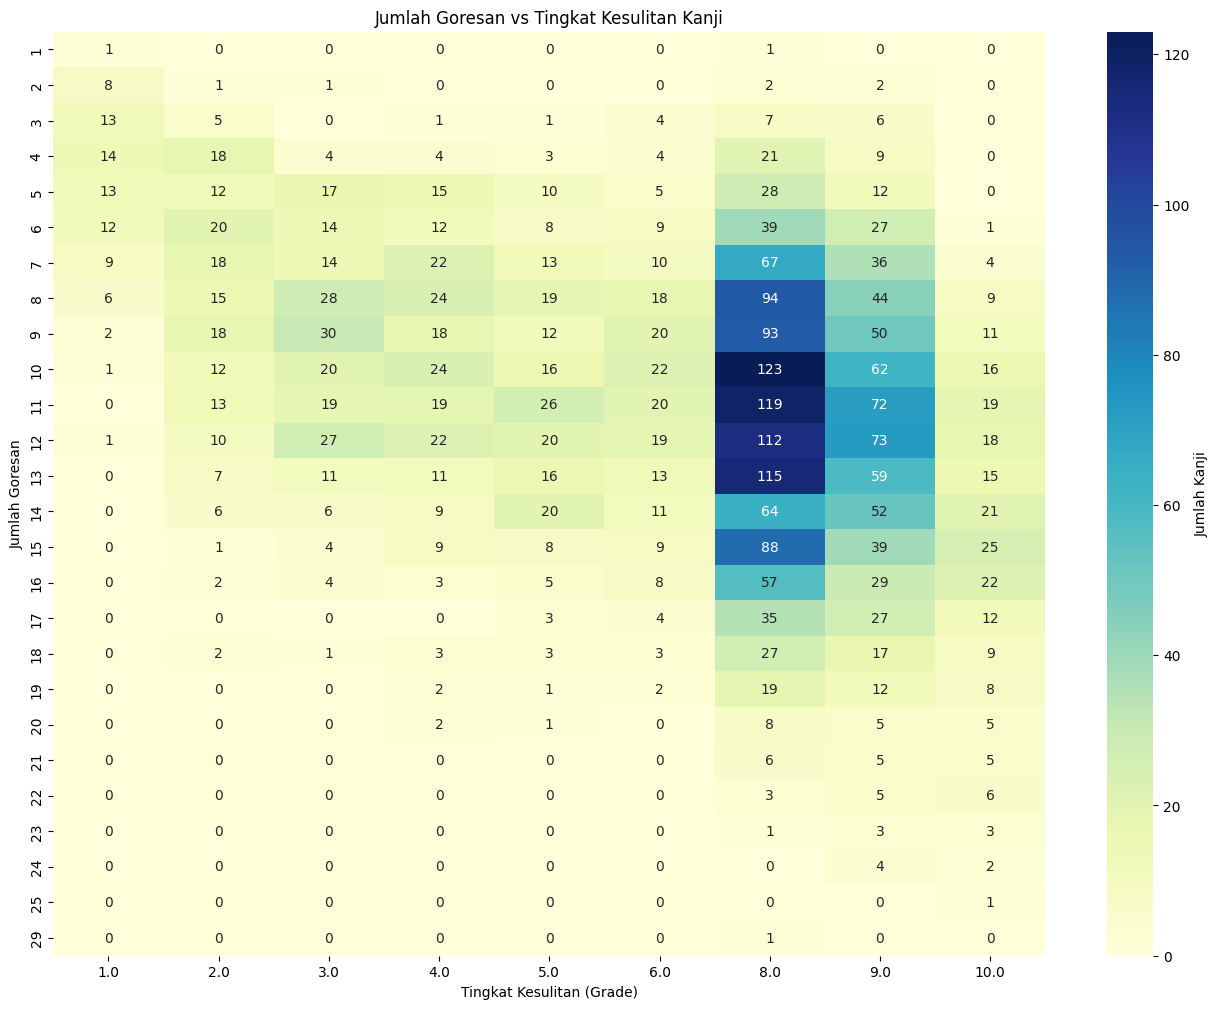

In [11]:
pivot_table = df.pivot_table(index='strokes', columns='grade', aggfunc='size', fill_value=0)

plt.figure(figsize=(16, 12))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Jumlah Kanji'})
plt.title('Jumlah Goresan vs Tingkat Kesulitan Kanji')
plt.xlabel('Tingkat Kesulitan (Grade)')
plt.ylabel('Jumlah Goresan')
plt.show()